In [74]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [75]:
data = pd.read_csv('../data/merged_df.csv', index_col=0)

In [76]:
data

,slug,name,positions,age,team_feature,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,season,nba_id,player_name,pos,team_target,oepm,depm,epm,ewins,feature_season
0,acyqu01,Quincy Acy,POWER FORWARD,22,TORONTO RAPTORS,29,342,15.9,0.632,0.027,...,2014,203112,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,2013
1,adrieje01,Jeff Adrien,POWER FORWARD,26,CHARLOTTE BOBCATS,52,713,13.4,0.493,0.012,...,2014,202399,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,2013
2,afflaar01,Arron Afflalo,SMALL FORWARD,27,ORLANDO MAGIC,64,2307,13.0,0.527,0.265,...,2014,201167,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,2013
3,aldrico01,Cole Aldrich,CENTER,24,HOUSTON ROCKETS,30,213,7.3,0.532,0.000,...,2014,202332,Cole Aldrich,C,NYK,-1.103380,1.572910,0.469531,0.767896,2013
4,aldrico01,Cole Aldrich,CENTER,24,SACRAMENTO KINGS,15,175,15.7,0.598,0.000,...,2014,202332,Cole Aldrich,C,NYK,-1.103380,1.572910,0.469531,0.767896,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,youngth01,Thaddeus Young,POWER FORWARD,30,INDIANA PACERS,81,2489,16.2,0.569,0.174,...,2020,201152,Thaddeus Young,PF,CHI,-2.751630,1.493800,-1.257840,1.837610,2019
3762,youngtr01,Trae Young,POINT GUARD,20,ATLANTA HAWKS,81,2503,17.0,0.539,0.384,...,2020,1629027,Trae Young,PG,ATL,5.990290,-2.527340,3.462950,9.214310,2019
3763,zelleco01,Cody Zeller,CENTER,26,CHARLOTTE HORNETS,49,1243,17.2,0.611,0.064,...,2020,203469,Cody Zeller,C,CHA,0.510248,-1.543110,-1.032870,1.746270,2019
3764,zubaciv01,Ivica Zubac,CENTER,21,LOS ANGELES LAKERS,33,516,19.5,0.633,0.000,...,2020,1627826,Ivica Zubac,C,LAC,1.936290,4.284770,6.221060,8.295400,2019


In [77]:
data.columns

Index(['slug', 'name', 'positions', 'age', 'team_feature', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player', 'is_combined_totals',
       'year_end', 'season', 'nba_id', 'player_name', 'pos', 'team_target',
       'oepm', 'depm', 'epm', 'ewins', 'feature_season'],
      dtype='object')

In [78]:
data = data[data.games_played >= 10] # remove players who played less than 10 games

In [79]:
mid_season_transfers_df = data[data.duplicated(subset=['name', 'year_end'])][['name', 'season']]
mid_season_transfers = list(zip(mid_season_transfers_df['name'].values, mid_season_transfers_df['season'].values))

In [80]:
len(mid_season_transfers)

290

In [81]:
for name, year in mid_season_transfers:
    data = data[(data['name'] != name) | (data['season'] != year)]

In [82]:
data

,slug,name,positions,age,team_feature,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,season,nba_id,player_name,pos,team_target,oepm,depm,epm,ewins,feature_season
0,acyqu01,Quincy Acy,POWER FORWARD,22,TORONTO RAPTORS,29,342,15.9,0.632,0.027,...,2014,203112,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,2013
1,adrieje01,Jeff Adrien,POWER FORWARD,26,CHARLOTTE BOBCATS,52,713,13.4,0.493,0.012,...,2014,202399,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,2013
2,afflaar01,Arron Afflalo,SMALL FORWARD,27,ORLANDO MAGIC,64,2307,13.0,0.527,0.265,...,2014,201167,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,2013
5,aldrila01,LaMarcus Aldridge,POWER FORWARD,27,PORTLAND TRAIL BLAZERS,74,2790,20.4,0.530,0.011,...,2014,200746,LaMarcus Aldridge,PF,POR,1.502790,1.370200,2.872990,9.896980,2013
6,allenla01,Lavoy Allen,CENTER,23,PHILADELPHIA 76ERS,79,1669,11.5,0.474,0.002,...,2014,202730,Lavoy Allen,C,IND,-2.155130,-0.720854,-2.875990,0.054738,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,winslju01,Justise Winslow,SMALL FORWARD,22,MIAMI HEAT,66,1959,12.8,0.513,0.342,...,2020,1626159,Justise Winslow,SF,MEM,-3.326920,1.055980,-2.270930,0.159798,2019
3757,woodch01,Christian Wood,POWER FORWARD,23,MILWAUKEE BUCKS,13,62,17.1,0.585,0.200,...,2020,1626174,Christian Wood,PF,DET,2.316110,1.421040,3.737150,6.029440,2019
3761,youngth01,Thaddeus Young,POWER FORWARD,30,INDIANA PACERS,81,2489,16.2,0.569,0.174,...,2020,201152,Thaddeus Young,PF,CHI,-2.751630,1.493800,-1.257840,1.837610,2019
3762,youngtr01,Trae Young,POINT GUARD,20,ATLANTA HAWKS,81,2503,17.0,0.539,0.384,...,2020,1629027,Trae Young,PG,ATL,5.990290,-2.527340,3.462950,9.214310,2019


In [83]:
data[data.duplicated(subset=['name', 'year_end'])][['name', 'season']] # sucessfully removed midseason transfers

,name,season


In [84]:
# split train and test
data.year_end.value_counts().sort_index()

2013    314
2014    319
2015    311
2016    319
2017    317
2018    330
2019    306
2020    343
2021    353
Name: year_end, dtype: int64

In [85]:
data.season.value_counts().sort_index()

2014    314
2015    319
2016    311
2017    319
2018    317
2019    330
2020    306
2021    343
2022    353
Name: season, dtype: int64

In [86]:
train = data[data.season != 2022]
test = data[data.season == 2022]

In [87]:
features = [
 'minutes_played',
 'player_efficiency_rating',
 'true_shooting_percentage',
 'three_point_attempt_rate',
 'free_throw_attempt_rate',
 'total_rebound_percentage',
 'assist_percentage',
 'steal_percentage',
 'block_percentage',
 'turnover_percentage',
 'usage_percentage',
 'win_shares_per_48_minutes',
 'box_plus_minus']

In [88]:
X_train = train[features]
X_test = test[features]

In [89]:
# normalize features
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = pd.DataFrame(mms.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test), columns= X_test.columns)

In [90]:
X_train['position'] = train['positions'].values.tolist()
X_test['position'] = test['positions'].values.tolist()

In [91]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [92]:
from sklearn.model_selection import cross_val_score
def eval_model(model):
    cv = cross_val_score(model, X_train, train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
eval_model(lr)

[-1.51023563 -1.65959276 -1.5581501  -1.53973217 -1.49652147]


1.5528464250560767

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
eval_model(rf)

[-1.52510392 -1.67714767 -1.53382209 -1.57288699 -1.51319031]


1.5644301952933086

In [95]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
eval_model(xgb)

[-1.65154805 -1.75652436 -1.56438923 -1.60649937 -1.66555896]


1.6489039951221869

In [96]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes = (8,16,32, 64), max_iter = 1000000, early_stopping = True, 
learning_rate='adaptive', learning_rate_init = 0.01)
eval_model(mlp)

[-1.49477275 -1.67248131 -1.5244067  -1.52315219 -1.48855005]


1.5406726006592943

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 25)
eval_model(knn)

[-1.59132114 -1.73024333 -1.53014607 -1.58202212 -1.57487223]


1.6017209779134611

In [89]:
lr.fit(X_train, train['epm'])
pd.Series(lr.coef_, index = lr.feature_names_in_).sort_values()

win_shares                      -29.209738
box_plus_minus                  -21.252926
defensive_rebound_percentage    -10.837300
offensive_rebound_percentage     -4.884358
true_shooting_percentage         -1.684198
age                              -1.289310
games_played                     -1.237430
position_POWER FORWARD           -0.141786
position_CENTER                  -0.112087
position_POINT GUARD             -0.104650
position_SMALL FORWARD           -0.062320
season                           -0.059411
position_SHOOTING GUARD           0.029566
free_throw_attempt_rate           0.131560
win_shares_per_48_minutes         0.350744
usage_percentage                  0.703565
assist_percentage                 0.747828
value_over_replacement_player     0.947995
steal_percentage                  0.976997
turnover_percentage               1.239912
three_point_attempt_rate          1.785996
block_percentage                  2.292501
minutes_played                    3.016914
player_effi

In [90]:
train_export = X_train.copy()
train_export['epm']  = train.epm.values

In [91]:
train_export.to_csv('../data/train_export_R.csv')

In [92]:
from sklearn.linear_model import Ridge
rlr = Ridge()
eval_model(rlr)

[-1.50144869 -1.64261185 -1.4893182  -1.51526614 -1.45728894]


1.5211867667570864

In [93]:
from sklearn.linear_model import Lasso
llr = Lasso(alpha=0.1)
eval_model(llr)

[-1.6927294  -1.79353586 -1.67856491 -1.71717237 -1.66001156]


1.7084028214656057

In [158]:
# Next Steps:

# Refit the baseline models and see the performance

# Model Focused Approach: Focus on 1-2 models and perform Hyperparameter optimization:
# XGboost 
# Random Forest
# Neural Network 
# Ridge Regression
# Lasso Regression 
# Other Models

# Data Focused Approach:  
# Feature Selection (we have a ton of features rn and it could be useful to reduce them)
# Feature Engineering (is there any additional features we can find online or just engineer)

In [98]:
rf.fit(X_train, train['epm'])
importances = rf.feature_importances_
forest_importances = pd.DataFrame(importances, index= X_train.columns)

In [99]:
forest_importances.sort_values(by = 0, ascending = False)

,0
value_over_replacement_player,0.398267
box_plus_minus,0.071466
player_efficiency_rating,0.049978
block_percentage,0.029164
age,0.028984
win_shares,0.027753
minutes_played,0.027614
free_throw_attempt_rate,0.026767
usage_percentage,0.025959
steal_percentage,0.024974


In [100]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train[features])

PCA()

array([31.61, 49.56, 65.85, 74.54, 80.13, 84.58, 88.58, 91.33, 93.01,
       94.51, 95.68, 96.69, 97.53, 98.34, 98.92, 99.43, 99.68, 99.84,
       99.93, 99.97, 99.99, 99.99, 99.99, 99.99])

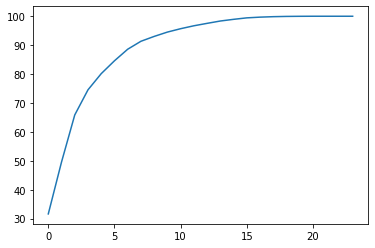

In [113]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_ * 100, 2)))
np.cumsum(np.round(pca.explained_variance_ratio_ * 100, 2))

In [116]:
# let's run PCA with 8 components now 

pca = PCA(n_components=8)
pca_predictors = pca.fit_transform(X_train[features])

In [117]:
def eval_model_pc(model):
    cv = cross_val_score(model, pca_predictors, train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [119]:
lr = LinearRegression()
eval_model_pc(lr)

[-1.50819685 -1.64412494 -1.50965645 -1.54529784 -1.49044378]


1.539543972352328

In [120]:
rf = RandomForestRegressor()
eval_model_pc(rf)

[-1.57451948 -1.67837795 -1.51109637 -1.55985742 -1.55470971]


1.575712186962842

In [121]:
xgb = XGBRegressor()
eval_model_pc(xgb)

[-1.66743827 -1.81894188 -1.56725624 -1.6847493  -1.61854524]


1.67138618669828

In [122]:
knn = KNeighborsRegressor(n_neighbors = 25)
eval_model_pc(knn)

[-1.54229191 -1.68097202 -1.52297572 -1.56945002 -1.53496245]


1.5701304240074379

In [123]:
eval_model_pc(mlp)

[-1.49288964 -1.64094111 -1.49018079 -1.5346483  -1.51979351]


1.5356906693564243

In [124]:
# manually selecting features using correlations and baseline models

best_features = ['value_over_replacement_player', 'age', 'minutes_played', 'player_efficiency_rating', 'true_shooting_percentage',
'three_point_attempt_rate', 'turnover_percentage', 'win_shares', 'defensive_box_plus_minus']

def eval_model_9_predictors(model):
    cv = cross_val_score(model, X_train[best_features], train['epm'], cv = 5, scoring='neg_mean_absolute_error')
    print(cv)
    return -1 * np.mean(cv)

In [125]:
eval_model_9_predictors(lr)

[-1.49679602 -1.638164   -1.50644501 -1.52230335 -1.47321774]


1.5273852249874675

In [126]:
eval_model_9_predictors(rf)

[-1.53526883 -1.63903239 -1.53081809 -1.56888661 -1.51718151]


1.5582374870705906

In [127]:
eval_model_9_predictors(xgb)

[-1.62060635 -1.69329772 -1.62133322 -1.64834113 -1.58721367]


1.634158420064648

In [128]:
eval_model_9_predictors(mlp)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

[-1.47746171 -1.64550134 -1.47300869 -1.52152539 -1.50854977]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names,

1.5252093817506323

In [129]:
eval_model_9_predictors(knn)

[-1.51594863 -1.69821387 -1.54123944 -1.55064553 -1.52054976]


1.5653194473058973

In [130]:
from sklearn.svm import SVR
svr = SVR()
eval_model_9_predictors(svr)

[-1.47824157 -1.62282602 -1.49588544 -1.49748794 -1.51389332]


1.5216668585945397

In [ ]:
# Final models to optimize:

# 1) Linear Regression 
# 2) Support Vectors Regressor
# 3) Random Forest
# 4) K-Nearest Neighbors 

In [132]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# Create a based model
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, train['epm'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  22.1s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.8s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  13.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [134]:
eval_model(rf)

[-1.50083052 -1.6510991  -1.48752779 -1.56008734 -1.48320562]


1.5365500722473342

In [135]:
eval_model(rf_random.best_estimator_)

[-1.49481765 -1.64612896 -1.47944591 -1.5206779  -1.48751494]


1.5257170743467032

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()


params = dict(n_neighbors = range(10, 20), weights = ['uniform' , 'distance'], leaf_size = range(20, 50, 5), 
              metric = ['minkowski', 'euclidean', 'manhattan'])

clf = GridSearchCV(knn, params, cv = 5)
search = clf.fit(X_train[best_features], train['epm'])
search.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 17,
 'weights': 'distance'}

In [140]:
eval_model_9_predictors(knn)

[-1.63205763 -1.77430101 -1.63194899 -1.59745007 -1.65390532]


1.657932604093458

In [141]:
eval_model_9_predictors(search.best_estimator_)

[-1.51368413 -1.69533559 -1.5457561  -1.53795157 -1.51954683]


1.5624548447347795

In [98]:
from sklearn.ensemble import RandomForestRegressor
best_rf = RandomForestRegressor(n_estimators = 600,
 min_samples_split =  2,
 min_samples_leaf =  1,
 max_features = 'sqrt',
 max_depth = 90,
 bootstrap = True)

In [100]:
best_rf

RandomForestRegressor(max_depth=90, max_features='sqrt', n_estimators=600)

In [101]:
best_rf.fit(X_train, train['epm'])

RandomForestRegressor(max_depth=90, max_features='sqrt', n_estimators=600)

In [102]:
importances = best_rf.feature_importances_
forest_importances = pd.DataFrame(importances, index= X_train.columns)
forest_importances.sort_values(by = 0, ascending = False)

,0
box_plus_minus,0.192513
player_efficiency_rating,0.145138
minutes_played,0.123877
win_shares_per_48_minutes,0.098691
usage_percentage,0.066851
true_shooting_percentage,0.050103
assist_percentage,0.049978
free_throw_attempt_rate,0.046266
steal_percentage,0.043567
block_percentage,0.041605


In [132]:
# Final Test MSE
from sklearn.metrics import mean_absolute_error as mae
preds = best_rf.predict(X_test)
mae(preds, test['epm'])

1.6406699955582154

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, train['epm'])
preds = lr.predict(X_test)
mae(preds, test['epm'])

1.6461235502266287

In [133]:
from sklearn.neural_network import MLPRegressor

best_network = MLPRegressor(hidden_layer_sizes=(50,50) * 10,
                       max_iter = 2000,activation = 'tanh',
                       solver = 'sgd',learning_rate='adaptive',
                       alpha = 0.001,
                       early_stopping = True)
best_network.fit(X_train, train['epm'])

preds_nn = best_network.predict(X_test)
mae(preds_nn, test['epm'])

1.6155822592358853

In [134]:
mae((preds_nn + preds) / 2, test['epm'])

1.6163856328995931

In [106]:
# make predictions for the 2022/23
latest_szn = pd.read_csv('../data/features/2021_2022_advanced_player_season_totals.csv')

In [107]:
def process_data(data):
    data = data[data.games_played >= 10] # remove players who played less than 10 games
    mid_season_transfers_df = data[data.duplicated(subset=['name'])]['name'].values.tolist()
    for name in mid_season_transfers_df:
        data = data[(data['name'] != name)]
    names = data.name.values.tolist()
    pos = data.positions.values.tolist()
    data = pd.DataFrame(mms.transform(data[features]), columns= data[features].columns)

    data['name'] = names
    data['pos'] = pos

    return data

In [108]:
latest_szn_processed = process_data(latest_szn)
latest_szn_processed

,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,turnover_percentage,usage_percentage,win_shares_per_48_minutes,box_plus_minus,name,pos
0,0.540325,0.396226,0.513672,0.283370,0.166411,0.461538,0.120419,0.215686,0.152318,0.267139,0.331412,0.485714,0.403292,Precious Achiuwa,CENTER
1,0.627670,0.550314,0.625000,0.003282,0.397239,0.636364,0.280977,0.313725,0.178808,0.463357,0.144092,0.675510,0.592593,Steven Adams,CENTER
2,0.572203,0.682390,0.718750,0.008753,0.357362,0.552448,0.305410,0.431373,0.172185,0.340426,0.518732,0.726531,0.666667,Bam Adebayo,CENTER
3,0.105196,0.317610,0.414062,0.398249,0.185583,0.381119,0.134380,0.156863,0.165563,0.234043,0.328530,0.432653,0.275720,Santi Aldama,POWER FORWARD
4,0.325151,0.613208,0.710938,0.109409,0.171012,0.409091,0.109948,0.117647,0.264901,0.189125,0.443804,0.630612,0.539095,LaMarcus Aldridge,CENTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0.453299,0.430818,0.656250,0.471554,0.179448,0.230769,0.289703,0.607843,0.079470,0.312057,0.095101,0.589796,0.600823,Delon Wright,SHOOTING GUARD
437,0.835830,0.795597,0.708984,0.432166,0.274540,0.146853,0.815009,0.254902,0.013245,0.342790,0.789625,0.712245,0.724280,Trae Young,POINT GUARD
438,0.215493,0.544025,0.597656,0.049234,0.189417,0.765734,0.191972,0.235294,0.198675,0.307329,0.371758,0.638776,0.469136,Omer Yurtseven,CENTER
439,0.103602,0.537736,0.755859,0.048140,0.417178,0.615385,0.164049,0.215686,0.112583,0.345154,0.256484,0.634694,0.423868,Cody Zeller,CENTER


In [109]:
X_latest_szn_processed = pd.get_dummies(latest_szn_processed.drop(columns = ['name']))

In [111]:
predictions = best_rf.predict(X_latest_szn_processed)

In [112]:
predictions_df = pd.DataFrame(predictions, columns = ['RF_Predictions'])
predictions_df['player_name'] = latest_szn_processed['name']
predictions_df.sort_values(by = 'RF_Predictions', ascending = False).head(20)

,RF_Predictions,player_name
210,6.959294,Nikola Jokić
10,5.945273,Giannis Antetokounmpo
125,5.639957,Joel Embiid
120,5.362709,Kevin Durant
74,5.324372,Jimmy Butler
201,4.959503,LeBron James
111,4.761020,Luka Dončić
319,4.517294,Chris Paul
437,4.479899,Trae Young
283,4.144754,Ja Morant


In [113]:
predictions = best_network.predict(X_latest_szn_processed)
predictions_df['NN_Predictions'] = predictions

In [114]:
predictions_df['prediction'] = (predictions_df['RF_Predictions'] + predictions_df['NN_Predictions']) / 2

In [115]:
predictions_df.sort_values(by = 'prediction', ascending = False).tail(20)

,RF_Predictions,player_name,NN_Predictions,prediction
412,-2.934920,Brad Wanamaker,-3.047120,-2.991020
294,-2.727561,RJ Nembhard Jr.,-3.257760,-2.992660
114,-3.003637,Devon Dotson,-2.983493,-2.993565
140,-3.023762,Marcus Garrett,-3.003752,-3.013757
351,-3.038658,Justin Robinson,-3.007276,-3.022967
298,-3.168930,Daishen Nix,-2.929174,-3.049052
392,-3.056489,Isaiah Todd,-3.048351,-3.052420
323,-3.068143,Jamorko Pickett,-3.063306,-3.065724
204,-3.165381,Alize Johnson,-3.051831,-3.108606
268,-2.996286,Alfonzo McKinnie,-3.254074,-3.125180


In [116]:
predictions_df.sort_values(by = 'prediction', ascending = False).head(20)

,RF_Predictions,player_name,NN_Predictions,prediction
210,6.959294,Nikola Jokić,5.625630,6.292462
10,5.945273,Giannis Antetokounmpo,5.553607,5.749440
125,5.639957,Joel Embiid,5.424414,5.532185
111,4.761020,Luka Dončić,4.916865,4.838942
74,5.324372,Jimmy Butler,4.152963,4.738668
201,4.959503,LeBron James,4.375172,4.667337
120,5.362709,Kevin Durant,3.645666,4.504188
437,4.479899,Trae Young,4.275841,4.377870
319,4.517294,Chris Paul,3.536148,4.026721
102,3.425549,Stephen Curry,4.492058,3.958804


In [117]:
epm_values  = pd.read_csv('../data/epm values 14-22.csv')

In [118]:
last_year = epm_values[epm_values.season == 2022][['player_name', 'epm']]

In [119]:
compare = predictions_df.merge(last_year, on = 'player_name')

In [120]:
compare['diff'] = compare['prediction']  - compare['epm']

In [121]:
compare.sort_values('diff').head(10)

,RF_Predictions,player_name,NN_Predictions,prediction,epm,diff
59,-1.331701,Dillon Brooks,-1.334917,-1.333309,3.63242,-4.965729
188,1.976024,Kyrie Irving,1.213449,1.594736,5.84608,-4.251344
372,-0.670102,Klay Thompson,-0.987749,-0.828926,3.04317,-3.872096
277,-0.075182,Mike Muscala,1.652280,0.788549,4.29388,-3.505331
137,1.246266,Paul George,0.689031,0.967648,4.40441,-3.436762
99,3.425549,Stephen Curry,4.492058,3.958804,7.15170,-3.192896
149,0.533908,Draymond Green,-0.098135,0.217886,3.32318,-3.105294
381,-0.349623,P.J. Tucker,-0.816497,-0.583060,2.09621,-2.679270
365,2.569072,Jayson Tatum,3.763074,3.166073,5.84114,-2.675067
351,-1.241783,Day'Ron Sharpe,-1.388475,-1.315129,1.26788,-2.583009


In [122]:
compare[compare.prediction > 0].sort_values('diff').tail(20)

,RF_Predictions,player_name,NN_Predictions,prediction,epm,diff
171,0.702094,Tyler Herro,0.024355,0.363225,0.072768,0.290457
271,4.144754,Ja Morant,3.493321,3.819038,3.479710,0.339328
26,0.140432,Scottie Barnes,0.703315,0.421874,-0.028199,0.450072
219,0.419421,Kyle Kuzma,-0.152412,0.133505,-0.426872,0.560377
25,0.230762,Harrison Barnes,0.145445,0.188104,-0.377933,0.566037
38,-0.014860,Saddiq Bey,0.101878,0.043509,-0.628274,0.671783
332,-0.428604,Paul Reed,1.444901,0.508148,-0.189337,0.697485
317,0.887148,Otto Porter Jr.,0.640546,0.763847,0.055623,0.708224
292,0.130121,Royce O'Neale,0.084888,0.107505,-0.643477,0.750982
130,1.761768,Daniel Gafford,0.997116,1.379442,0.517262,0.862180


In [131]:
compare.rename(columns = {'epm' : 'last_year_epm'})[['player_name', 'prediction', 'last_year_epm', 'diff']].to_csv('compared_final_predictions.csv')

In [125]:
compare.sort_values(by = 'prediction', ascending = False)

,RF_Predictions,player_name,NN_Predictions,prediction,epm,diff
10,5.945273,Giannis Antetokounmpo,5.553607,5.749440,7.32347,-1.574030
119,5.639957,Joel Embiid,5.424414,5.532185,7.89632,-2.364135
72,5.324372,Jimmy Butler,4.152963,4.738668,4.51184,0.226828
193,4.959503,LeBron James,4.375172,4.667337,6.07762,-1.410283
114,5.362709,Kevin Durant,3.645666,4.504188,6.37402,-1.869832
...,...,...,...,...,...,...
299,-3.270655,Miye Oni,-3.359246,-3.314951,-5.41955,2.104599
274,-3.528973,Mychal Mulder,-3.183241,-3.356107,-6.64467,3.288563
320,-3.470133,Myles Powell,-3.364634,-3.417383,-5.83362,2.416237
44,-3.746013,Keljin Blevins,-3.100987,-3.423500,-7.21751,3.794010


In [128]:
predictions_df[['player_name', 'prediction']].to_csv('22_23_final_predictions.csv')

In [135]:
eval_model(best_network)

[-1.50635266 -1.6551225  -1.51500667 -1.50815977 -1.50693347]


1.5383150139296604

In [136]:
eval_model(best_rf)

[-1.52608616 -1.65529029 -1.50842441 -1.52400422 -1.50470404]


1.5437018247636705